In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.externals import joblib

#This problem can be solved by using classification .
#for classification we need to devide rating into 2 class .0 for bad and 1 for good qaulity
df=pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [350]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [351]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [352]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [353]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [354]:
df.isin([0]).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [355]:
imp = SimpleImputer(missing_values=0,strategy="mean")
imp.fit(df[['citric acid']])
df['citric acid']=imp.fit_transform(df[['citric acid']]).ravel()
df.isin([0]).any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001955E8B5B08>,
      dtype=object)

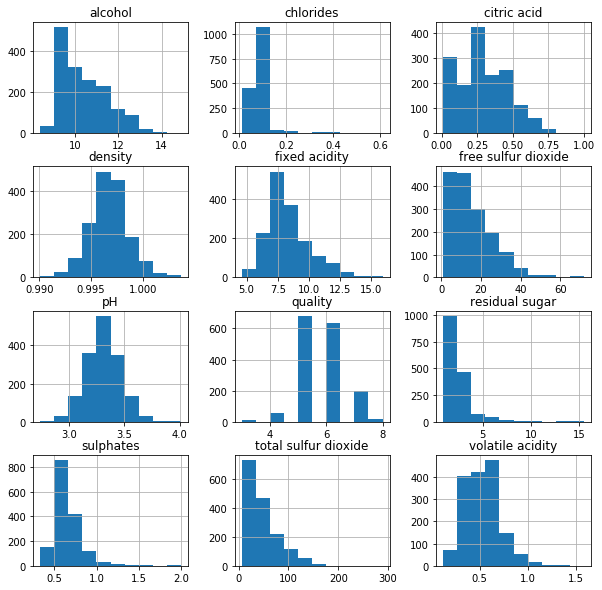

In [356]:
df.hist(figsize=(10,10))

In [357]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [358]:
df_empty = pd.DataFrame({'quality' : []})
print(df['quality'])
df['quality']=np.where(df['quality']>=6, 1, 0)

    

print(df_empty['quality'].value_counts())

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
Series([], Name: quality, dtype: int64)


In [359]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.304749
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

In [360]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.295358,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.295358,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.295358,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019560951AC8>,
      dtype=object)

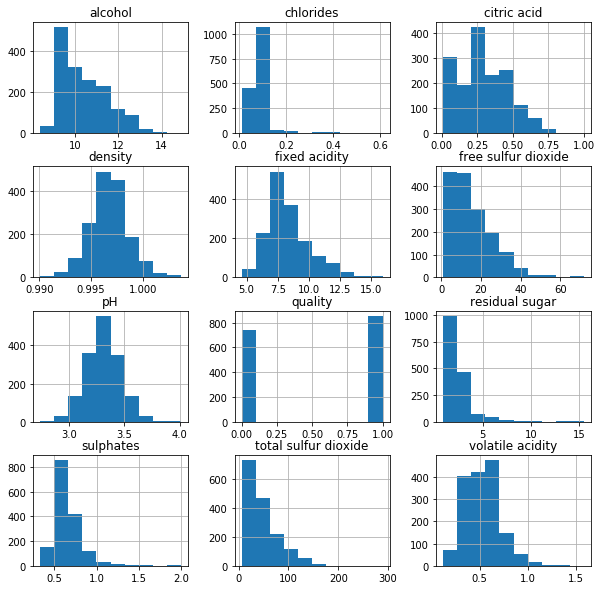

In [361]:
df.hist(figsize=(10,10))

In [362]:
#skewness removal
#log transform works if thr is no 0 data and for +ve skew 
def removeSkew(df,col):
    print("column :",col," ,skewness :",df[col].skew())
    if(df[col].skew()>0.55):
        df[col]= np.log1p(df[col])
        print("After log transform: column :",col," ,skewness :",df[col].skew())  

In [363]:
#for col in df.columns:
#    removeSkew(df,col)

In [364]:
df.shape

(1599, 12)

In [365]:
#z=np.abs(zscore(df))
#df=df[(z<3).all(axis=1)]
#df.shape

In [366]:
print(df)
#df.drop('A',axis=1)
x=df.drop(df.columns[[11]],axis=1)
x.shape


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700     0.295358             1.9      0.076   
1               7.8             0.880     0.295358             2.6      0.098   
2               7.8             0.760     0.040000             2.3      0.092   
3              11.2             0.280     0.560000             1.9      0.075   
4               7.4             0.700     0.295358             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600     0.080000             2.0      0.090   
1595            5.9             0.550     0.100000             2.2      0.062   
1596            6.3             0.510     0.130000             2.3      0.076   
1597            5.9             0.645     0.120000             2.0      0.075   
1598            6.0             0.310     0.470000             3.6      0.067   

      free sulfur dioxide  

(1599, 11)

In [367]:
y=df.iloc[:,-1]
y.shape
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [368]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [369]:
r_score=cross_val_score(LogisticRegression( ),x,y,cv=10)
print(r_score.mean())

r_score=cross_val_score(DecisionTreeClassifier(),x,y,cv=10)
print(r_score.mean())

parameters={"kernel":['poly','rbf','linear']}
gdcv=GridSearchCV(SVC(),parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)


0.7360809748427672
0.6385180817610063
{'kernel': 'rbf'}


In [370]:
r_score=cross_val_score(SVC(kernel='rbf'),x,y,cv=10)
print(r_score.mean())


0.7429559748427673


In [371]:
parameters={"n_neighbors":range(1,30)}
knc= KNeighborsClassifier()
gdcv=GridSearchCV(knc,parameters,cv=10)
gdcv.fit(x,y)
print(gdcv.best_params_)

knc= KNeighborsClassifier(n_neighbors=20)
r_score=cross_val_score(knc,x,y,cv=10)
print(r_score.mean())




{'n_neighbors': 20}
0.7210809748427673


In [372]:
parameters={'learning_rate':[0.001,0.01,0.1,1.0],'n_estimators':[10,50,100,500,1000]}

grid_search=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)
grid_search.fit(x,y)
print(grid_search.best_params_)


{'learning_rate': 0.01, 'n_estimators': 500}


In [373]:
grad_classifier=GradientBoostingClassifier(n_estimators=500)
cv_score=cross_val_score(grad_classifier,x,y,cv=10)
print(cv_score.mean())

0.7004088050314465


In [374]:
#support below base model
#AdaBoostClassifier, BernoulliNB, DecisionTreeClassifier, ExtraTreeClassifier, ExtraTreesClassifier, MultinomialNB, NuSVC, Perceptron, RandomForestClassifier, RidgeClassifierCV, SGDClassifier, SVC.
#commented bcz taking lots of time
#parameters={'learning_rate':[0.001,0.01,0.1,1.0],'n_estimators':[50,100,500,1000],'base_estimator':[SVC(),GaussianNB(),SVC(),DecisionTreeClassifier()],'algorithm':['SAMME']}

#grid_search=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)
#grid_search.fit(x,y)
#print(grid_search.best_params_)

adaReg=AdaBoostClassifier()
cv_score=cross_val_score(adaReg,x,y,cv=10)
print(cv_score.mean())


0.7160141509433962


In [375]:
parameters={'n_estimators':[10,50,100,500,1000]}

grid_search=GridSearchCV(RandomForestClassifier(),parameters,cv=10)
grid_search.fit(x,y)
print(grid_search.best_params_)

{'n_estimators': 100}


In [376]:
rand_class=RandomForestClassifier(n_estimators=500)
cv_score=cross_val_score(rand_class,x,y,cv=10)
print(cv_score.mean())

0.7304481132075471


In [377]:
max_rand_state=0;
max_r2_score=0;
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    #lr=DecisionTreeClassifier()
    #lr=KNeighborsClassifier(n_neighbors=17)
    lr=SVC()
    #lr=LogisticRegression( )
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r_score=accuracy_score(y_test,y_pred)
    if(r_score>max_r2_score):
        max_r2_score=r_score
        max_rand_state=i
        
print("Max random state:",max_rand_state,"max_accuracy_score:",max_r2_score)        

Max random state: 45 max_accuracy_score: 0.8


In [378]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)
#svc=LogisticRegression()
#svc=DecisionTreeClassifier()
#svc=KNeighborsClassifier(n_neighbors=17)
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("score:",svc.score(x_train,y_train))
r_score=r2_score(y_test,y_pred)
print("r2_score:",r_score)
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("cross val score:",cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean())
print("classification report:",classification_report(y_test,y_pred))
print("accuracy score:",accuracy_score(y_test,y_pred))



score: 0.7943706020328382
r2_score: 0.19382774366241529
mean squared error: 0.2
mean absolute error: 0.2
cross val score: 0.7392163009404389
classification report:               precision    recall  f1-score   support

           0       0.77      0.81      0.79       146
           1       0.83      0.79      0.81       174

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320

accuracy score: 0.8


In [379]:
joblib.dump(svc,'svc_wine-quality.pkl')

['svc_wine-quality.pkl']